# L-Scaling Query Complexity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as mcolors
from random import shuffle
import matplotlib
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [13]:
COLORS = ['dimgrey', 'navy', 'firebrick', 'darkgreen']

In [14]:
ROOT = '/Users/jonathanlu/Documents/data_sym/LS'
STATE = 'GHZ'
NUM_DEPTHS = 4
L = 14
NRUN = 10
queries = np.zeros((NUM_DEPTHS, L, NRUN))
for i in range(NUM_DEPTHS):
    for j in range(L):
        queries[i,j] = np.load(f'{ROOT}/{STATE}/d{i}/queries_{j+1}_{STATE}.npy')

In [15]:
avgs = np.mean(queries, axis=-1)
stdevs = np.std(queries, axis=-1)
x = np.arange(L) + 1
avgs /= 10**5
stdevs /= 10**5

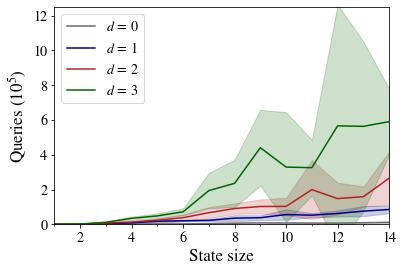

In [18]:
_, ax = plt.subplots()
FONT_SIZE = 17
plt.rc('font', size=14)

for i in range(NUM_DEPTHS):
    plt.plot(x, avgs[i], label=rf'$d \,=\, ${i}', c=COLORS[i])
    plt.fill_between(x, avgs[i] - stdevs[i], avgs[i] + stdevs[i], alpha=0.2, color=COLORS[i])

plt.xlabel("State size", fontsize=FONT_SIZE)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.xlim(left=1, right=L)
plt.ylim(0, 12.5)
plt.ylabel(r"Queries ($10^5$)", fontsize=FONT_SIZE)
plt.legend(loc='upper left')
# plt.title(STATE)
plt.savefig(f'/Users/jonathanlu/Documents/data_sym/LS_{STATE}.pdf')